In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Add another convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
    tf.keras.layers.Flatten(),
    #The same 128 dense layers, and 10 output layers as in the pre-convolution example:
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6114 - accuracy: 0.7770
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3116 - accuracy: 0.8860
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2536 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2133 - accuracy: 0.9202
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.9066
Test loss: 0.2606504261493683, Test accuracy: 90.65999984741211


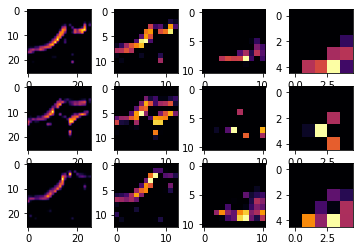

In [9]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Add another convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
    tf.keras.layers.Flatten(),
    #The same 128 dense layers, and 10 output layers as in the pre-convolution example:
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6082 - accuracy: 0.7792
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3028 - accuracy: 0.8881
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2534 - accuracy: 0.9047
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2208 - accuracy: 0.9179
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3047 - accuracy: 0.8933
Test loss: 0.3046726584434509, Test accuracy: 89.32999968528748


In [13]:
for n in layer_outputs:
    print(n)
    print('\n')

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")


KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")


KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")


KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 64), dtype=tf.float32, name=None), name='max_pooling2d_3/MaxPool:0', description="created by layer 'max_pooling2d_3'")


KerasTensor(type_spec=TensorSpec(shape=(None, 1600), dtype=tf.float32, name=None), name='flatten_2/Reshape:0', description="created by layer 'flatten_2'")


KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_4/Relu:0', description="created by layer 'dense_4'")


KerasTensor(type_spec=TensorSp